##**Few-Shot Classification: A Deep Dive**
This document explores the concept of few-shot classification and details the implementation of a Prototypical Network for this task.

**Understanding Few-Shot Classification**

Few-shot classification tackles the challenge of classifying images with limited labeled data. In this scenario, we have a labeled support set containing a small number of examples per class (typically less than 10) and a query set of unseen images for which we want to predict labels. The model leverages the information from the support set to classify the query images effectively.

**Metric-Based Approach: Prototypical Networks**

Most few-shot classification methods employ a metric-based approach. Here's a breakdown of the process:

  1. **Feature Extraction:** A Convolutional Neural Network (CNN) acts as a feature extractor. It takes an image as input and outputs a representation (embedding) in a specific feature space. The goal is for the CNN to embed images from the same class close together in this space, even for unseen classes.

  2. **Prototype Computation:** Prototypical Networks compute a prototype for each class in the support set. This prototype is the mean of all embedding vectors corresponding to the support images of that class.

  3. **Classification by Nearest Neighbor:** During classification, each query image is compared to the prototypes using a distance metric (like Euclidean distance). The query image is assigned the label of the closest prototype in the feature space.

**Core Techniques**

Most methods rely on metrics to compare image features. Here's the two-step process:

1. **Feature Extraction with CNNs:** A convolutional neural network (CNN) takes both support and query images and converts them into numerical representations in a feature space. Think of this space as a way to organize images based on their similarities. The key here is for the CNN to learn how to represent similar classes close together in this space, even for unseen classes.

2. **Similarity Comparison:** This is where Prototypical Networks come in. They calculate a prototype (average embedding) for each class in the support set. Then, each query image is assigned the label of the closest prototype in the feature space, based on distance (e.g., Euclidean distance).

**Challenges Faced**

Encountered an 'AttributeError' during the training phase due to the improper usage of the label method in the train_set, right before the TaskSampler.

This likely occurred due to incorrect usage of the `label` method in the `train_set` before the `TaskSampler`.

**Key Learnings**

* This project provides insights into:
* The concept of few-shot classification
* Implementation of a Prototypical Network using PyTorch
* Utilizing custom data loaders for few-shot tasks
* Employing meta-learning to enhance few-shot classification performance


**Process Walkthrough**

This section details the steps involved in building and training a model:

1. **Setting Up the Environment:**
    * Install the required libraries (PyTorch, torchvision, Omniglot, tqdm, Easy FSL).
    * Learn how to use a GPU runtime on Google Colab (optional, but recommended for faster training).

2. **Data Preparation:**
    * Load the Omniglot dataset, a popular benchmark for few-shot learning (similar to MNIST for handwritten digits).
    * Split the dataset into training and testing sets.

3. **Model Architecture:**
    * We'll use a pre-trained ResNet18 model (trained on ImageNet) as the backbone for feature extraction. The final layers of ResNet18 are replaced with a simple layer to output a feature vector.

4. **Prototypical Network Model:**
    * The model takes support and query images as input and outputs predicted labels for the query set. The pre-trained ResNet18 acts as the backbone for feature extraction.

5. **Custom Data Loader:**
    * Standard PyTorch data loaders don't handle few-shot classification tasks well. We need a custom data loader that:
        * Samples a specific number of classes (n-way) from the dataset.
        * Samples a specific number of images per class for both support (n_shot) and query sets (n_query).
    * A custom collate function is used to combine these images and labels into a structured format for the model.

6. **Training the Model:**
    * We create a data loader that delivers 5-way, 5-shot tasks (common in few-shot learning).
    * With minimal training on Omniglot and only 5 examples per class, the model can achieve around 86% accuracy!

**Experiment and Improve**

Now that you understand the basics, play around with the model:

* Try different backbones (feature extractors).
* Experiment with various distance metrics for similarity comparison.
* Explore more complex few-shot classification scenarios with more classes or fewer examples per class.

**Meta-Learning (Optional):**

We perform meta-learning, where the model is trained on a vast number of randomly generated few-shot classification tasks from the Omniglot dataset (excluding the classes used for testing). This training process refines the model's ability to learn from limited data.

**Conclusion**

The implemented Prototypical Network achieves an accuracy of around 86% on Omniglot with only 5 examples per class, showcasing its effectiveness. Further meta-learning on Omniglot images improves the accuracy to an impressive 98.26%. This demonstrates the model's ability to generalize to unseen classes despite limited training data.

In [ ]:
!pip install easyfsl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import Omniglot
from torchvision.models import resnet18
from tqdm import tqdm

from easyfsl.samplers import TaskSampler
from easyfsl.utils import plot_images, sliding_average

In [ ]:
image_size = 28

# NB: background=True selects the train set, background=False selects the test set
# It's the nomenclature from the original paper, we just have to deal with it

train_set = Omniglot(
    root="./data",
    background=True,
    transform=transforms.Compose(
        [
            transforms.Grayscale(num_output_channels=3),
            transforms.RandomResizedCrop(image_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
        ]
    ),
    download=True,
)
test_set = Omniglot(
    root="./data",
    background=False,
    transform=transforms.Compose(
        [
            # Omniglot images have 1 channel, but our model will expect 3-channel images
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize([int(image_size * 1.15), int(image_size * 1.15)]),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
        ]
    ),
    download=True,
)

100%|██████████| 9464212/9464212 [00:00<00:00, 209296395.44it/s]

Extracting ./data/omniglot-py/images_background.zip to ./data/omniglot-py


100%|██████████| 6462886/6462886 [00:00<00:00, 182133604.34it/s]

Extracting ./data/omniglot-py/images_evaluation.zip to ./data/omniglot-py


In [ ]:
class PrototypicalNetworks(nn.Module):
    def __init__(self, backbone: nn.Module):
        super(PrototypicalNetworks, self).__init__()
        self.backbone = backbone

    def forward(
        self,
        support_images: torch.Tensor,
        support_labels: torch.Tensor,
        query_images: torch.Tensor,
    ) -> torch.Tensor:
        """
        Predict query labels using labeled support images.
        """
        # Extract the features of support and query images
        z_support = self.backbone.forward(support_images)
        z_query = self.backbone.forward(query_images)

        # Infer the number of different classes from the labels of the support set
        n_way = len(torch.unique(support_labels))
        # Prototype i is the mean of all instances of features corresponding to labels == i
        z_proto = torch.cat(
            [
                z_support[torch.nonzero(support_labels == label)].mean(0)
                for label in range(n_way)
            ]
        )

        # Compute the euclidean distance from queries to prototypes
        dists = torch.cdist(z_query, z_proto)

        # And here is the super complicated operation to transform those distances into classification scores!
        scores = -dists
        return scores


convolutional_network = resnet18(pretrained=True)
convolutional_network.fc = nn.Flatten()
print(convolutional_network)

model = PrototypicalNetworks(convolutional_network).cuda()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.3MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
N_WAY = 5 # Number of classes in a task
N_SHOT = 5 # Number of images per class in the support set
N_QUERY = 10 # Number of images per class in the query set
N_EVALUATION_TASKS = 100

# The sampler needs a dataset with a "get_labels" method. Check the code if you have any doubt!
test_set.get_labels = lambda: [instance[1] for instance in test_set._flat_character_images]
test_sampler = TaskSampler(
    test_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_EVALUATION_TASKS
)

test_loader = DataLoader(
    test_set,
    batch_sampler=test_sampler,
    num_workers=12,
    pin_memory=True,
    collate_fn=test_sampler.episodic_collate_fn,
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


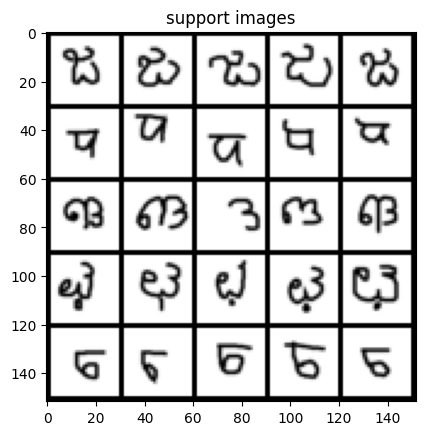

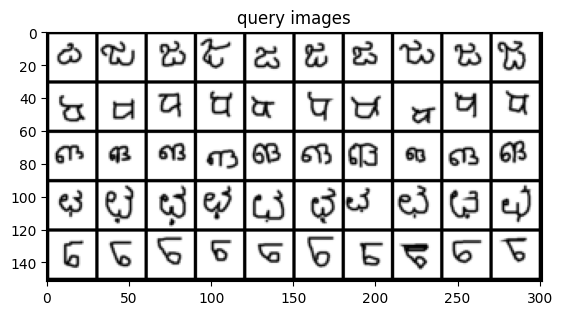

In [ ]:
(
    example_support_images,
    example_support_labels,
    example_query_images,
    example_query_labels,
    example_class_ids,
) = next(iter(test_loader))

plot_images(example_support_images, "support images", images_per_row=N_SHOT)
plot_images(example_query_images, "query images", images_per_row=N_QUERY)

In [ ]:
model.eval()
example_scores = model(
    example_support_images.cuda(),
    example_support_labels.cuda(),
    example_query_images.cuda(),
).detach()

_, example_predicted_labels = torch.max(example_scores.data, 1)

print("Ground Truth / Predicted")
for i in range(len(example_query_labels)):
    print(
        f"{test_set._characters[example_class_ids[example_query_labels[i]]]} / {test_set._characters[example_class_ids[example_predicted_labels[i]]]}"
    )

Ground Truth / Predicted
Kannada/character19 / Malayalam/character35
Kannada/character19 / Kannada/character19
Kannada/character19 / Kannada/character19
Kannada/character19 / Kannada/character19
Kannada/character19 / Kannada/character19
Kannada/character19 / Mongolian/character15
Kannada/character19 / Kannada/character19
Kannada/character19 / Kannada/character19
Kannada/character19 / Kannada/character19
Kannada/character19 / Kannada/character19
Tengwar/character14 / Mongolian/character15
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Tengwar/character14 / Tengwar/character14
Malayalam/character35 / Malayalam/character35
Malayalam/character35 / Malayalam/character35
Malayalam/character35 / Malayalam/cha

In [ ]:
def evaluate_on_one_task(
    support_images: torch.Tensor,
    support_labels: torch.Tensor,
    query_images: torch.Tensor,
    query_labels: torch.Tensor,
) -> [int, int]:
    """
    Returns the number of correct predictions of query labels, and the total number of predictions.
    """
    return (
        torch.max(
            model(support_images.cuda(), support_labels.cuda(), query_images.cuda())
            .detach()
            .data,
            1,
        )[1]
        == query_labels.cuda()
    ).sum().item(), len(query_labels)


def evaluate(data_loader: DataLoader):
    # We'll count everything and compute the ratio at the end
    total_predictions = 0
    correct_predictions = 0

    # eval mode affects the behaviour of some layers (such as batch normalization or dropout)
    # no_grad() tells torch not to keep in memory the whole computational graph (it's more lightweight this way)
    model.eval()
    with torch.no_grad():
        for episode_index, (
            support_images,
            support_labels,
            query_images,
            query_labels,
            class_ids,
        ) in tqdm(enumerate(data_loader), total=len(data_loader)):

            correct, total = evaluate_on_one_task(
                support_images, support_labels, query_images, query_labels
            )

            total_predictions += total
            correct_predictions += correct

    print(
        f"Model tested on {len(data_loader)} tasks. Accuracy: {(100 * correct_predictions/total_predictions):.2f}%"
    )


evaluate(test_loader)

100%|██████████| 100/100 [00:06<00:00, 14.98it/s]

Model tested on 100 tasks. Accuracy: 86.88%


In [ ]:
N_TRAINING_EPISODES = 40000
N_VALIDATION_TASKS = 100

# train_set.labels = [instance[1] for instance in train_set._flat_character_images]   #incorrect, ignore this line; the following line is correct.
train_set.get_labels = lambda: [instance[1] for instance in train_set._flat_character_images]

train_sampler = TaskSampler(
    train_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_TRAINING_EPISODES
)
train_loader = DataLoader(
    train_set,
    batch_sampler=train_sampler,
    num_workers=12,
    pin_memory=True,
    collate_fn=train_sampler.episodic_collate_fn,
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def fit(
    support_images: torch.Tensor,
    support_labels: torch.Tensor,
    query_images: torch.Tensor,
    query_labels: torch.Tensor,
) -> float:
    optimizer.zero_grad()
    classification_scores = model(
        support_images.cuda(), support_labels.cuda(), query_images.cuda()
    )

    loss = criterion(classification_scores, query_labels.cuda())
    loss.backward()
    optimizer.step()

    return loss.item()

In [ ]:
# Train the model yourself with this cell

log_update_frequency = 10

all_loss = []
model.train()
with tqdm(enumerate(train_loader), total=len(train_loader)) as tqdm_train:
    for episode_index, (
        support_images,
        support_labels,
        query_images,
        query_labels,
        _,
    ) in tqdm_train:
        loss_value = fit(support_images, support_labels, query_images, query_labels)
        all_loss.append(loss_value)

        if episode_index % log_update_frequency == 0:
            tqdm_train.set_postfix(loss=sliding_average(all_loss, log_update_frequency))

100%|██████████| 40000/40000 [48:38<00:00, 13.71it/s, loss=0.206]


In [ ]:
evaluate(test_loader)

100%|██████████| 100/100 [00:05<00:00, 19.03it/s]

Model tested on 100 tasks. Accuracy: 98.26%
